### Kayla Hoffman 
### Github User: kaylah176
### USC ID: 

In [1]:
# Import libraries
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, hamming_loss, silhouette_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from tqdm.notebook import tqdm_notebook

import warnings 
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# 1. Multi-class and Multi-Label Classification Using Support Vector Machines

## (a)
Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [3]:
# Read the data 
AnuranCalls = pd.read_csv("../Data_HW7/Anuran Calls (MFCCs)/Frogs_MFCCs.csv")

# Discard the RecordID column 
AnuranCalls.drop('RecordID', axis=1, inplace=True)
display(AnuranCalls)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


In [4]:
# Split train and test data
# Choose 70% of the data randomly as the training set, the rest as testing set
AnuranCalls_train, AnuranCalls_test = train_test_split(AnuranCalls, train_size=0.7, shuffle=True, random_state=42)
print("Train set shape:", AnuranCalls_train.shape)
print("Test set shape:", AnuranCalls_test.shape)

Train set shape: (5036, 25)
Test set shape: (2159, 25)


## (b) 
Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

### i.
Research exact match and hamming score/loss methods for evaluating multilabel classification and use them in evaluating the classifiers in this problem.

Some articles/sources that I found helpful: 
* [Deep dive into multi-label classification..! (With detailed Case Study)](https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff)
* [Metrics and scoring: quantifying the quality of predictions: Hamming loss](https://scikit-learn.org/stable/modules/model_evaluation.html#hamming-loss)
* [Metrics for Multilabel Classification](https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics)

We will use both methods to evaluate classifiers in this problem.

### ii.
Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

Following the instruction in the footnote, we will train the SVM with very large and very small parameters on the whole training data and find very large and very small parameters for which the training accuracy is not below a threshold (70%). Then we can select a fixed number of parameters (e.g., 20) between those points for cross validation.

In [5]:
# Specify X_train, y_train, X_test, y_test
X_train = AnuranCalls_train.iloc[:, :-3]
y_train = AnuranCalls_train.iloc[:, -3:]
X_test = AnuranCalls_test.iloc[:, :-3]
y_test = AnuranCalls_test.iloc[:, -3:]

In [6]:
# Define very large parameters
C_large = [10**i for i in range(0, 5)]
gamma_large = [10**i for i in range(0, 5)]
print(C_large)
# Define very small parameters
C_small = [10**i for i in range(-5, 0)]
gamma_small = [10**i for i in range(-5, 0)]
print(C_small)

[1, 10, 100, 1000, 10000]
[1e-05, 0.0001, 0.001, 0.01, 0.1]


In [7]:
# Train SVM models using GridSearchCV for multi-label or one-vs-all classification --> this case is multi label 


    ## Parameters: 
    # X_train (array-like): Feature matrix 
    # y_train (DataFrame or array-like): Target labels (multi column for multi label or binary for one vs all)
    # C_input (list): List of penality parameter values to search 
    # Gamma_input (list): List of kernel width values to search 

# Define a function to train SVM models for multi-label or one-vs-all classification
def svm_model(X_train, y_train, C_input, gamma_input):
    # Define parameter grid
    params = {
        'C': C_input,
        'gamma': gamma_input,
        'kernel': ['rbf'],
        'decision_function_shape': ['ovr']  # One-vs-rest strategy
    }

    # Dictionary to store trained models
    models = {}

    # Train SVM for each label (multi-label scenario or one-vs-all)
    for label in y_train.columns:  # Assuming y_train is a DataFrame with columns for each label
        print(f"Training SVM for label {label}...")
        
        # Initialize GridSearchCV object
        svclassifier = GridSearchCV(estimator=SVC(), param_grid=params, cv=10, n_jobs=8, scoring='accuracy')
        
        # Fit the model for the current label
        svclassifier.fit(X_train, y_train[label])
        
        # Get the best model and cross-validation score
        best_model = svclassifier.best_estimator_
        best_params = svclassifier.best_params_
        cv_score = svclassifier.best_score_
        
        # Store the trained model in the dictionary
        models[label] = best_model
        
        # Report model statistics
        print(f"Label {label}: Best C={best_params['C']}, γ={best_params['gamma']}")
        print(f"Best estimator: {best_model}")
        print(f"Cross-validation score: {cv_score}\n")

    return models  # Return dictionary of trained models

### SVMs - Large Parameters

In [8]:
trained_models = svm_model(X_train, y_train, C_large, gamma_large)

Training SVM for label Family...
Label Family: Best C=100, γ=1
Best estimator: SVC(C=100, gamma=1)
Cross-validation score: 0.9926532077377006

Training SVM for label Genus...
Label Genus: Best C=100, γ=1
Best estimator: SVC(C=100, gamma=1)
Cross-validation score: 0.9896738615923507

Training SVM for label Species...
Label Species: Best C=10, γ=1
Best estimator: SVC(C=10, gamma=1)
Cross-validation score: 0.9892766417368802



### SVMs - Small Parameters

In [9]:
trained_models = svm_model(X_train, y_train, C_small, gamma_small)

Training SVM for label Family...
Label Family: Best C=0.1, γ=0.1
Best estimator: SVC(C=0.1, gamma=0.1)
Cross-validation score: 0.8711311496102748

Training SVM for label Genus...
Label Genus: Best C=0.1, γ=0.1
Best estimator: SVC(C=0.1, gamma=0.1)
Cross-validation score: 0.8250603521726783

Training SVM for label Species...
Label Species: Best C=0.1, γ=0.1
Best estimator: SVC(C=0.1, gamma=0.1)
Cross-validation score: 0.8399562939821388



From what we obtained using both smaller and larger parameters, we want to narrow down our cross validation parameters in the range of log $\log{(\lambda)} \in\{-1, \dots, 2\}$ and by also using linear increments for the Gaussian Kernel parameter in the range of {0.1, ... , 1}

### SVMs - The Final Model

In [10]:
# Create paramter sets
C = np.logspace(-1, 2, 20)
print(C)
gamma = np.linspace(0.1, 1, 20)
print(gamma)

[  0.1          0.14384499   0.20691381   0.29763514   0.42813324
   0.61584821   0.88586679   1.27427499   1.83298071   2.6366509
   3.79269019   5.45559478   7.8475997   11.28837892  16.23776739
  23.35721469  33.59818286  48.32930239  69.51927962 100.        ]
[0.1        0.14736842 0.19473684 0.24210526 0.28947368 0.33684211
 0.38421053 0.43157895 0.47894737 0.52631579 0.57368421 0.62105263
 0.66842105 0.71578947 0.76315789 0.81052632 0.85789474 0.90526316
 0.95263158 1.        ]


In [11]:
# Train SVM models using GridSearchCV for multi-label or one-vs-all classification --> this case is multi label 


    ## Parameters: 
    # X_train (array-like): Feature matrix 
    # y_train (DataFrame or array-like): Target labels (multi column for multi label or binary for one vs all)
    # C_input (list): List of penality parameter values to search 
    # Gamma_input (list): List of kernel width values to search 


# Define parameter grid
params = {
    'C': C,
    'gamma': gamma,
    'kernel': ['rbf'],
    'decision_function_shape': ['ovr']  # One-vs-rest strategy
}

# Train SVM for each label (multi-label scenario or one-vs-all)
for label in y_train.columns:  # Assuming y_train is a DataFrame with columns for each label
    print(f"Training SVM for label {label}...")
        
    # Initialize GridSearchCV object
    svclassifier = GridSearchCV(estimator=SVC(), param_grid=params, cv=10, n_jobs=8, scoring='accuracy')
        
    # Fit the model for the current label
    svclassifier.fit(X_train, y_train[label])
        
    # Get the best model and cross-validation score
    best_model = svclassifier.best_estimator_
    best_params = svclassifier.best_params_
    cv_score = svclassifier.best_score_

    # Prediction on training and testing set
    y_train_pred = svclassifier.predict(X_train)
    y_test_pred = svclassifier.predict(X_test)
    
    # Obtain exact match score
    train_score = accuracy_score(y_train[label], y_train_pred)
    test_score = accuracy_score(y_test[label], y_test_pred)
    
    # Obtain hamming loss
    hamming_loss_train = hamming_loss(y_train[label], y_train_pred)
    hamming_loss_test = hamming_loss(y_test[label], y_test_pred)
        
    # Report model statistics
    print(f"Label {label}: Best C={best_params['C']}, γ={best_params['gamma']}")
    print(f"Best estimator: {best_model}")
    print(f"Cross-validation score: {cv_score}\n")

Training SVM for label Family...
Label Family: Best C=100.0, γ=0.9052631578947369
Best estimator: SVC(C=100.0, gamma=0.9052631578947369)
Cross-validation score: 0.9926532077377006

Training SVM for label Genus...
Label Genus: Best C=69.51927961775606, γ=1.0
Best estimator: SVC(C=69.51927961775606, gamma=1.0)
Cross-validation score: 0.9896738615923507

Training SVM for label Species...
Label Species: Best C=7.847599703514611, γ=1.0
Best estimator: SVC(C=7.847599703514611, gamma=1.0)
Cross-validation score: 0.989475054435293



In [12]:
# Report model statistics
print(f"Label {label}: Best C={best_params['C']}, γ={best_params['gamma']}")
print(svclassifier.best_estimator_)
print(f'Cross-validation score: {cv_score}')
print(f'Train exact match: {train_score}\nTrain hamming loss: {hamming_loss_train}')
print(f'Test exact match: {test_score}\nTest hamming loss: {hamming_loss_test}\n')


Label Species: Best C=7.847599703514611, γ=1.0
SVC(C=7.847599703514611, gamma=1.0)
Cross-validation score: 0.989475054435293
Train exact match: 0.9990071485305798
Train hamming loss: 0.0009928514694201747
Test exact match: 0.9893469198703103
Test hamming loss: 0.010653080129689671



From the results of the weight of the SVM penalty and width of Gaussian Kernel for each label shown above, we can see that the SVM penalty differs from each of the different labels, while the width of the Gaussian Kernel is close to one another for each label. 

### iii.
Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [13]:
# Standardize attributes on training and testing data
scaler = StandardScaler()
# Fit the scaler on training data
scaler.fit(X_train)
X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

In [14]:
# Define a function to train L1-penalized SVMs 
def svm_linear(C_input):
    # Define parameter grid
    params = {
    'penalty': ['l1'],
    'dual': [False],
    'C': C_input,
    'multi_class': ['ovr'],
    'max_iter': [5000]
    }

    # Dictionary to store trained models
    models = {}

    # Train SVM for each label (multi-label scenario or one-vs-all)
    for label in y_train.columns:  # Assuming y_train is a DataFrame with columns for each label
        print(f"Training SVM for label {label}...")
        
        # Initialize GridSearchCV object
        svclassifier = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False, max_iter=20000), param_grid=params, cv=10, n_jobs=8, scoring='accuracy')
        
        # Fit the model for the current label
        svclassifier.fit(X_train_stand, y_train[label])
        
        # Get the best model and cross-validation score
        best_model = svclassifier.best_estimator_
        best_params = svclassifier.best_params_
        cv_score = svclassifier.best_score_
        
        # Store the trained model in the dictionary
        models[label] = best_model
        
        # Report model statistics
        print(f"Label {label}: Best C={best_params['C']}")
        print(f"Best estimator: {best_model}")
        print(f"Cross-validation score: {cv_score}\n")

    return models  # Return dictionary of trained models

### L1-penalized SVM - Large Parameters

In [15]:
# %%time
# import os
# os.environ["PYTHONWARNINGS"] = "ignore::ConvergenceWarning"

# warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Train on very large parameter pairs
svm_linear(C_large)

Training SVM for label Family...
Label Family: Best C=1
Best estimator: LinearSVC(C=1, dual=False, max_iter=5000, penalty='l1')
Cross-validation score: 0.9406288459717882

Training SVM for label Genus...


/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/s

Label Genus: Best C=10
Best estimator: LinearSVC(C=10, dual=False, max_iter=5000, penalty='l1')
Cross-validation score: 0.9527422764997319

Training SVM for label Species...


/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/s

Label Species: Best C=10
Best estimator: LinearSVC(C=10, dual=False, max_iter=5000, penalty='l1')
Cross-validation score: 0.9602847202499291



{'Family': LinearSVC(C=1, dual=False, max_iter=5000, penalty='l1'),
 'Genus': LinearSVC(C=10, dual=False, max_iter=5000, penalty='l1'),
 'Species': LinearSVC(C=10, dual=False, max_iter=5000, penalty='l1')}

### L1-penalized SVMS - Small Parameters

In [16]:
%%time

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarnings globally
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Train on very small parameter pairs
svm_linear(C_small)

Training SVM for label Family...
Label Family: Best C=0.1
Best estimator: LinearSVC(C=0.1, dual=False, max_iter=5000, penalty='l1')
Cross-validation score: 0.938247499132191

Training SVM for label Genus...
Label Genus: Best C=0.1
Best estimator: LinearSVC(C=0.1, dual=False, max_iter=5000, penalty='l1')
Cross-validation score: 0.9426141563318501

Training SVM for label Species...
Label Species: Best C=0.1
Best estimator: LinearSVC(C=0.1, dual=False, max_iter=5000, penalty='l1')
Cross-validation score: 0.9499585818422795

CPU times: user 3.34 s, sys: 87.4 ms, total: 3.42 s
Wall time: 15.4 s


{'Family': LinearSVC(C=0.1, dual=False, max_iter=5000, penalty='l1'),
 'Genus': LinearSVC(C=0.1, dual=False, max_iter=5000, penalty='l1'),
 'Species': LinearSVC(C=0.1, dual=False, max_iter=5000, penalty='l1')}

### L1-Penalized SVMS - The Final Model

In [17]:
# Create paramter sets
C = np.logspace(-1, 1, 20)
print(C)

[ 0.1         0.1274275   0.16237767  0.20691381  0.26366509  0.33598183
  0.42813324  0.54555948  0.6951928   0.88586679  1.12883789  1.43844989
  1.83298071  2.33572147  2.97635144  3.79269019  4.83293024  6.15848211
  7.8475997  10.        ]


In [18]:
# Train SVM models using GridSearchCV for multi-label or one-vs-all classification --> this case is multi label 


    ## Parameters: 
    # X_train (array-like): Feature matrix 
    # y_train (DataFrame or array-like): Target labels (multi column for multi label or binary for one vs all)
    # C_input (list): List of penality parameter values to search 
    # Gamma_input (list): List of kernel width values to search 


# Define parameter grid
params = {
    'penalty': ['l1'],
    'dual': [False],
    'C': C,
    'multi_class': ['ovr'],
    'max_iter': [50000]
}

# Train SVM for each label (multi-label scenario or one-vs-all)
for label in y_train.columns:  # Assuming y_train is a DataFrame with columns for each label
    print(f"Training SVM for label {label}...")
        
    # Initialize GridSearchCV object
    svclassifier = GridSearchCV(estimator=LinearSVC(), param_grid=params, cv=10, n_jobs=8, scoring='accuracy')
        
    # Fit the model for the current label
    svclassifier.fit(X_train, y_train[label])
        
    # Get the best model and cross-validation score
    best_model = svclassifier.best_estimator_
    best_params = svclassifier.best_params_
    cv_score = svclassifier.best_score_
        

    # Prediction on training and testing set
    y_train_pred = svclassifier.predict(X_train)
    y_test_pred = svclassifier.predict(X_test)
    
    # Obtain exact match score
    train_score = accuracy_score(y_train[label], y_train_pred)
    test_score = accuracy_score(y_test[label], y_test_pred)
    
    # Obtain hamming loss
    hamming_loss_train = hamming_loss(y_train[label], y_train_pred)
    hamming_loss_test = hamming_loss(y_test[label], y_test_pred)
        
    # Report model statistics
    print(f"Label {label}: Best C={best_params['C']}")
    print(f"Best estimator: {best_model}")
    print(f"Cross-validation score: {cv_score}\n")
    print(f'Train exact match: {train_score}\nTrain hamming loss: {hamming_loss_train}')
    print(f'Test exact match: {test_score}\nTest hamming loss: {hamming_loss_test}\n')

Training SVM for label Family...


/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/s

Label Family: Best C=2.9763514416313175
Best estimator: LinearSVC(C=2.9763514416313175, dual=False, max_iter=50000, penalty='l1')
Cross-validation score: 0.9402332039508978

Train exact match: 0.9416203335980937
Train hamming loss: 0.058379666401906276
Test exact match: 0.9263547938860583
Test hamming loss: 0.07364520611394164

Training SVM for label Genus...


/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/s

Label Genus: Best C=7.847599703514611
Best estimator: LinearSVC(C=7.847599703514611, dual=False, max_iter=50000, penalty='l1')
Cross-validation score: 0.9513506264003281

Train exact match: 0.954328832406672
Train hamming loss: 0.04567116759332804
Test exact match: 0.9416396479851783
Test hamming loss: 0.058360352014821676

Training SVM for label Species...


/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/s

Label Species: Best C=10.0
Best estimator: LinearSVC(C=10.0, dual=False, max_iter=50000, penalty='l1')
Cross-validation score: 0.959689087696046

Train exact match: 0.9634630659253376
Train hamming loss: 0.03653693407466243
Test exact match: 0.9606299212598425
Test hamming loss: 0.03937007874015748



From what we've observed above, the weight is different from each other given different labels. In addition, the SVM performs better than the L1-penalized SVM. 

### iv.
Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [19]:
# Check the class distribution for each label 
for label in y_train.columns:
    display(AnuranCalls[label].value_counts())

Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64

Adenomera        4150
Hypsiboas        1593
Ameerega          542
Dendropsophus     310
Leptodactylus     270
Scinax            148
Osteocephalus     114
Rhinella           68
Name: Genus, dtype: int64

AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: Species, dtype: int64

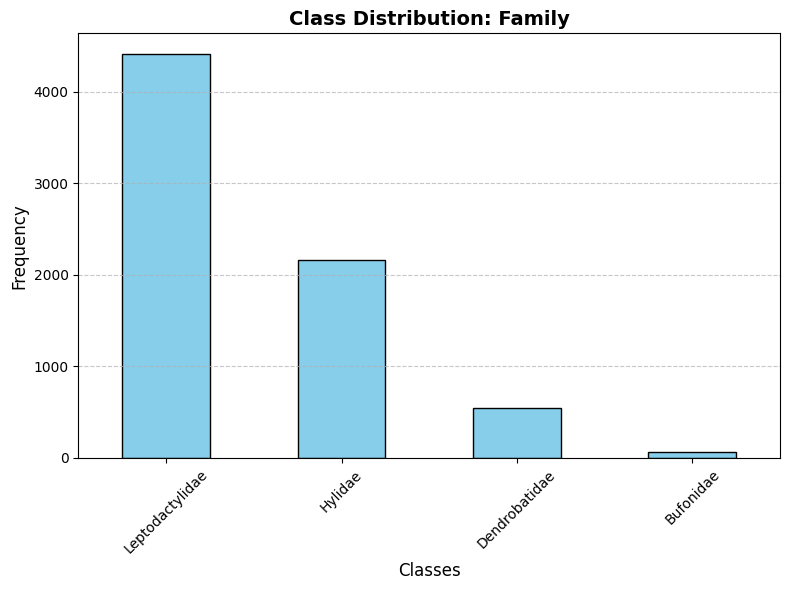

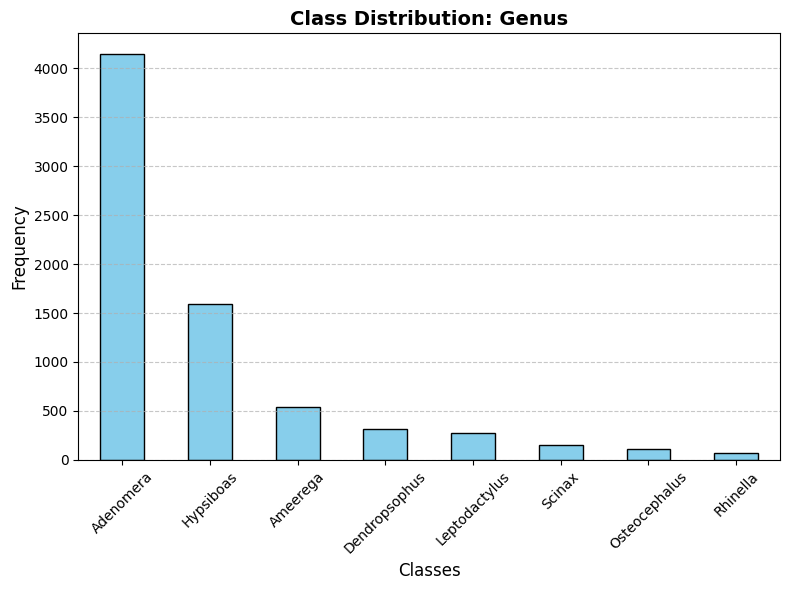

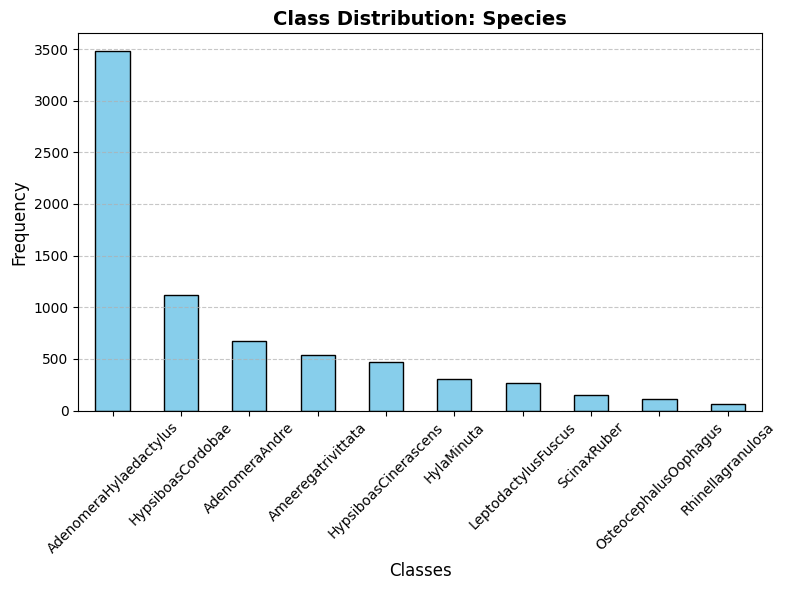

In [20]:
# Plot class distribution in each label
for label in y_train.columns:
    # Get class counts
    class_counts = pd.value_counts(AnuranCalls[label])
    
    # Create the plot
    plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
    class_counts.plot.bar(color='skyblue', edgecolor='black', rot=45)  # Improved styling
    
    # Add title and labels
    plt.title(f"Class Distribution: {label}", fontsize=14, fontweight='bold')
    plt.xlabel("Classes", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    
    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()  # Adjust layout to prevent overlapping elements
    plt.show()

### L1-Penalized SVMs with SMOTE - Large Parameters

In [21]:
%%time
from imblearn.combine import SMOTEENN

# Set up pipeline
# Lets apply SMOTE with Under-Sampling for better balnce and performance
pipeline = imbpipeline(steps = [['smote', SMOTEENN(random_state=42)],  # Use SMOTE in each iteration
                                ['svm', LinearSVC()]])

# Define parameter grid
params = {
    'penalty': ['l1'],
    'dual': [False],
    'C': C_large,
    'multi_class': ['ovr'],
    'max_iter': [1000]
}

# Train SVM for each label (multi-label scenario or one-vs-all)
for label in y_train.columns:  # Assuming y_train is a DataFrame with columns for each label
    print(f"Training SVM for label {label}...")
        
    # Initialize GridSearchCV object
    svclassifier = GridSearchCV(estimator=LinearSVC(), param_grid=params, cv=10, n_jobs=8)
        
    # Fit the model for the current label
    svclassifier.fit(X_train_stand, y_train[label])
        
    # Get the best model and cross-validation score
    best_model = svclassifier.best_estimator_
    best_params = svclassifier.best_params_
    cv_score = svclassifier.best_score_
        
        
    # Report model statistics
    print(f"Label {label}: Best C={best_params['C']}")
    print(f"Best estimator: {best_model}")
    print(f"Cross-validation score: {cv_score}\n")

Training SVM for label Family...


/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/s

Label Family: Best C=1
Best estimator: LinearSVC(C=1, dual=False, penalty='l1')
Cross-validation score: 0.9406288459717882

Training SVM for label Genus...


/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/s

Label Genus: Best C=10
Best estimator: LinearSVC(C=10, dual=False, penalty='l1')
Cross-validation score: 0.9523454511029066

Training SVM for label Species...


/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/s

Label Species: Best C=10
Best estimator: LinearSVC(C=10, dual=False, penalty='l1')
Cross-validation score: 0.9602847202499291

CPU times: user 5.57 s, sys: 204 ms, total: 5.77 s
Wall time: 1min 13s


### L1-Penalized SVMs SMOTE - Small Parameters 

In [22]:
%%time

# Set up pipeline
# Lets apply SMOTE with Under-Sampling for better balnce and performance
pipeline = imbpipeline(steps = [['smote', SMOTEENN(random_state=42)],  # Use SMOTE in each iteration
                                ['svm', LinearSVC()]])

# Define parameter grid
params = {
    'penalty': ['l1'],
    'dual': [False],
    'C': C_small,
    'multi_class': ['ovr'],
    'max_iter': [1000]
}

# Train SVM for each label (multi-label scenario or one-vs-all)
for label in y_train.columns:  # Assuming y_train is a DataFrame with columns for each label
    print(f"Training SVM for label {label}...")
        
    # Initialize GridSearchCV object
    svclassifier = GridSearchCV(estimator=LinearSVC(), param_grid=params, cv=10, n_jobs=8)
        
    # Fit the model for the current label
    svclassifier.fit(X_train_stand, y_train[label])
        
    # Get the best model and cross-validation score
    best_model = svclassifier.best_estimator_
    best_params = svclassifier.best_params_
    cv_score = svclassifier.best_score_
        
        
    # Report model statistics
    print(f"Label {label}: Best C={best_params['C']}")
    print(f"Best estimator: {best_model}")
    print(f"Cross-validation score: {cv_score}\n")

Training SVM for label Family...


/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Label Family: Best C=0.1
Best estimator: LinearSVC(C=0.1, dual=False, penalty='l1')
Cross-validation score: 0.9380486919751332

Training SVM for label Genus...


/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/s

Label Genus: Best C=0.1
Best estimator: LinearSVC(C=0.1, dual=False, penalty='l1')
Cross-validation score: 0.9426141563318501

Training SVM for label Species...


/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/s

Label Species: Best C=0.1
Best estimator: LinearSVC(C=0.1, dual=False, penalty='l1')
Cross-validation score: 0.9499585818422795

CPU times: user 3.22 s, sys: 86.1 ms, total: 3.3 s
Wall time: 13.6 s


### L1-Penalized SVMs with SMOTE - Final Model 

In [23]:
# Create paramter sets
C = np.logspace(-1, 1, 20)
print(C)

[ 0.1         0.1274275   0.16237767  0.20691381  0.26366509  0.33598183
  0.42813324  0.54555948  0.6951928   0.88586679  1.12883789  1.43844989
  1.83298071  2.33572147  2.97635144  3.79269019  4.83293024  6.15848211
  7.8475997  10.        ]


In [24]:
%%time
from imblearn.combine import SMOTEENN

# Set up pipeline
# Lets apply SMOTE with Under-Sampling for better balnce and performance
pipeline = imbpipeline(steps = [['smote', SMOTEENN(random_state=42)],  # Use SMOTE in each iteration
                                ['svm', LinearSVC()]])

# Define parameter grid
params = {
    'penalty': ['l1'],
    'dual': [False],
    'C': C_small,
    'multi_class': ['ovr'],
    'max_iter': [1000]
}

# Train SVM for each label (multi-label scenario or one-vs-all)
for label in y_train.columns:  # Assuming y_train is a DataFrame with columns for each label
    print(f"Training SVM for label {label}...")
        
    # Initialize GridSearchCV object
    svclassifier = GridSearchCV(estimator=LinearSVC(), param_grid=params, cv=10, n_jobs=8)
        
    # Fit the model for the current label
    svclassifier.fit(X_train_stand, y_train[label])
        
    # Get the best model and cross-validation score
    best_model = svclassifier.best_estimator_
    best_params = svclassifier.best_params_
    cv_score = svclassifier.best_score_

    # Prediction on training and testing set
    y_train_pred = svclassifier.predict(X_train_stand)
    y_test_pred = svclassifier.predict(X_test_stand)
    cv_score = svclassifier.best_score_
    # Obtain exact match score
    train_score = accuracy_score(y_train[label], y_train_pred)
    test_score = accuracy_score(y_test[label], y_test_pred)
    # Obtain hamming loss
    hamming_loss_train = hamming_loss(y_train[label], y_train_pred)
    hamming_loss_test = hamming_loss(y_test[label], y_test_pred)
        
        
    # Report model statistics
    print(f"Label {label}: Best C={best_params['C']}")
    print(f"Best estimator: {best_model}")
    print(f"Cross-validation score: {cv_score}\n")

Training SVM for label Family...


/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Label Family: Best C=0.1
Best estimator: LinearSVC(C=0.1, dual=False, penalty='l1')
Cross-validation score: 0.938247499132191

Training SVM for label Genus...


/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/s

Label Genus: Best C=0.1
Best estimator: LinearSVC(C=0.1, dual=False, penalty='l1')
Cross-validation score: 0.9426141563318501

Training SVM for label Species...


/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/s

Label Species: Best C=0.1
Best estimator: LinearSVC(C=0.1, dual=False, penalty='l1')
Cross-validation score: 0.9499585818422795

CPU times: user 3.49 s, sys: 333 ms, total: 3.82 s
Wall time: 13.7 s


# 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set
**Monte-Carlo Simulation:** Perform the following procedures 50 times, and report

## (a)
Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose $k \in \{1, 2, \dots, 50\}$ automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [25]:
# Obtain labels and features from AnuranCalls
AnuranCalls_features = AnuranCalls.iloc[:, :-3]
AnuranCalls_labels = AnuranCalls.iloc[:, -3:]

In [26]:
%%time
# Use Silhouettes to find optimal K
sil_score = list()
k_range = [i for i in range(2, 51)]
# Start from k=2 as Silhouette Coefficient is only defined 
# if number of labels is 2 <= n_labels <= n_samples - 1
for k in k_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10)
    kmeans.fit(AnuranCalls_features)
    score = silhouette_score(AnuranCalls_features, kmeans.labels_)
    sil_score.append(score)

CPU times: user 2min 9s, sys: 30.9 s, total: 2min 40s
Wall time: 48.3 s


In [27]:
# Find optimal K
optimal_k = np.argmax(sil_score)+2
print("Optimal value of k:", optimal_k)

Optimal value of k: 4


In [28]:
# Report Silhouettes highest score
sil_score_df = pd.DataFrame({'cluster' : k_range, 'sil_score' : sil_score})
display(sil_score_df.sort_values(by=['sil_score'], ascending=False).head(5))

,cluster,sil_score
2,4,0.383995
3,5,0.370110
1,3,0.367682
0,2,0.348678
17,19,0.286204


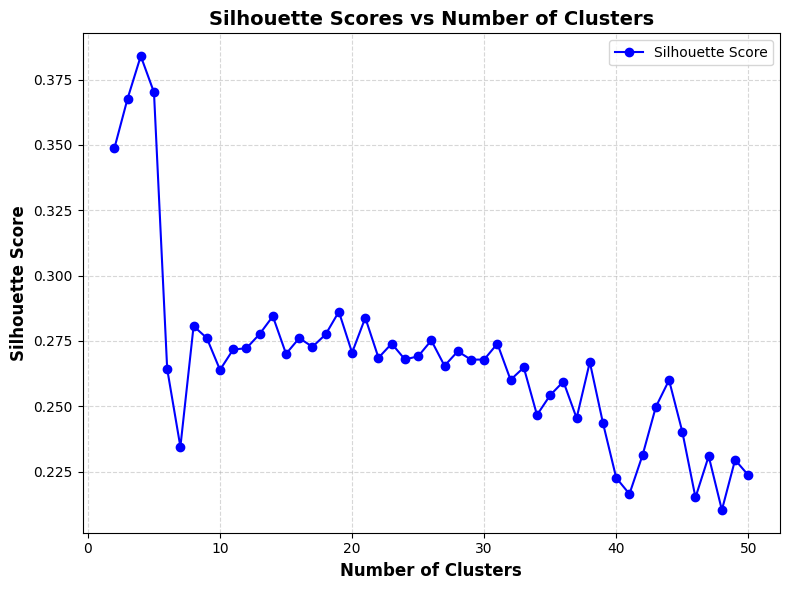

In [29]:
# Plot result
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
plt.plot(sil_score_df['cluster'], sil_score_df['sil_score'], marker='o', linestyle='-', color='blue', label='Silhouette Score')  # Add markers and styling

# Add labels and title with better formatting
plt.xlabel("Number of Clusters", fontsize=12, fontweight='bold')
plt.ylabel("Silhouette Score", fontsize=12, fontweight='bold')
plt.title("Silhouette Scores vs Number of Clusters", fontsize=14, fontweight='bold')

# Add gridlines for better readability
plt.grid(alpha=0.5, linestyle='--')

# Add legend
plt.legend(loc='best', fontsize=10)

# Show plot with tight layout
plt.tight_layout()
plt.show()


## (b) 
In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [30]:
# Fit K-Means with optimal k selected
kmeans_model = KMeans(n_clusters=optimal_k, init="k-means++", n_init=10)
kmeans_model.fit(AnuranCalls_features)

# Generate dataframe to perform analysis
kmeans_labels = pd.DataFrame({'labels': kmeans_model.labels_})
labels_df = pd.concat([kmeans_labels, AnuranCalls_labels], axis=1)  # Kmeans labels and true labels

In [31]:
# Hold majority information for each cluster
label_majorityclass = dict()

# Find majority in each cluster for family, genus, and species
for i in range(0, optimal_k):
    labels_temp_df = labels_df[labels_df["labels"]==i]  # Obtain subset of dataframe based on cluster number
    
    majority_name = list()
    # Find the majority class in family, genus, and species column
    for label in AnuranCalls_labels.columns:
        majority_name.append(labels_temp_df[label].value_counts().idxmax())
    
    # Store information 
    label_majorityclass[i] = majority_name

In [32]:
label_majorityclass

{0: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'],
 1: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 2: ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'],
 3: ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata']}

## (c) 
Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [33]:
# Generate class -> index dictionary to help us iterate through information
label_index_pointer = dict()
index = 0
for label in AnuranCalls_labels.columns:
    label_index_pointer[label] = index
    index += 1

In [34]:
# Initialize storage using dictionary comprehension
metrics = {
    'distance': [],
    'score': [],
    'loss': []
}

# Precompute majority classes for each cluster-label pair
majority_classes = {
    (cluster, label): label_majorityclass[cluster][label_index_pointer[label]]
    for cluster in range(optimal_k)
    for label in AnuranCalls_labels.columns
}

for cluster in range(optimal_k):
    cluster_data = labels_df[labels_df["labels"] == cluster]
    n_samples = len(cluster_data)
    
    if n_samples == 0:
        continue
        
    cluster_metrics = {
        'distance': [],
        'score': [],
        'loss': []
    }
    
    for label in AnuranCalls_labels.columns:
        # Vectorized comparison with majority class
        correct = (cluster_data[label] == majority_classes[(cluster, label)]).values
        incorrect = ~correct
        
        # Calculate metrics
        cluster_metrics['distance'].append(incorrect.sum())
        cluster_metrics['score'].append(correct.mean())
        cluster_metrics['loss'].append(incorrect.mean())
    
    # Store cluster-level averages
    for metric in metrics:
        metrics[metric].append(np.mean(cluster_metrics[metric]))

# Calculate final averages
final_metrics = {metric: np.mean(values) for metric, values in metrics.items()}

# Print results with f-strings
print(f"Average Hamming distance: {final_metrics['distance']:.3f}")
print(f"Average Hamming score: {final_metrics['score']:.3f}")
print(f"Average Hamming loss: {final_metrics['loss']:.3f}")


Average Hamming distance: 400.083
Average Hamming score: 0.718
Average Hamming loss: 0.282


### Monte Carlo Simulation

In [36]:
# Monte Carlo Simulation parameters
num_simulations = 50  # Number of simulations
k_range = range(2, 51)  # Range of clusters

# Results storage
montecarlo_hamming_distance = []
montecarlo_hamming_score = []
montecarlo_hamming_loss = []

# Set random seed for reproducibility
np.random.seed(42)

# Find optimal k using silhouette score
def find_optimal_k(features, k_range):
    
    sil_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=np.random.randint(0, 10000))
        kmeans.fit(features)
        sil_scores.append(silhouette_score(features, kmeans.labels_))
    return np.argmax(sil_scores) + 2

# Calculate majority class for each cluster
def calculate_majority_classes(labels_df, optimal_k):
    
    return labels_df.groupby('labels').agg(lambda x: x.value_counts().idxmax()).to_dict('index')

# Calculate Hamming distance, score, and loss
def calculate_hamming_metrics(labels_df, majority_classes, true_labels_columns):

    hamming_distance = []
    hamming_score = []
    hamming_loss = []
    
    for cluster_label, majority_class in majority_classes.items():
        labels_temp_df = labels_df[labels_df['labels'] == cluster_label]
        total_samples = labels_temp_df.shape[0]
        
        for label in true_labels_columns:
            correct_labels = (labels_temp_df[label] == majority_class[label]).sum()
            incorrect_labels = total_samples - correct_labels
            
            hamming_distance.append(incorrect_labels)
            hamming_score.append(correct_labels / total_samples)
            hamming_loss.append(incorrect_labels / total_samples)
    
    avg_hamming_distance = statistics.mean(hamming_distance)
    avg_hamming_score = statistics.mean(hamming_score)
    avg_hamming_loss = statistics.mean(hamming_loss)
    
    return avg_hamming_distance, avg_hamming_score, avg_hamming_loss

# Main Simulation Loop
for sim in range(num_simulations):
    # Part (a): Find optimal k using silhouette score
    optimal_k = find_optimal_k(AnuranCalls_features, k_range)
    
    # Part (b): Fit K-Means with optimal k and calculate majority class per cluster
    kmeans_model = KMeans(n_clusters=optimal_k, init="k-means++", n_init=10, random_state=42)
    kmeans_model.fit(AnuranCalls_features)
    
    labels_df = pd.concat([pd.DataFrame({'labels': kmeans_model.labels_}), AnuranCalls_labels], axis=1)
    majority_classes = calculate_majority_classes(labels_df, optimal_k)
    
    # Part (c): Calculate Hamming metrics
    avg_hamming_distance, avg_hamming_score, avg_hamming_loss = calculate_hamming_metrics(
        labels_df,
        majority_classes,
        AnuranCalls_labels.columns
    )
    
    # Save results for each simulation
    montecarlo_hamming_distance.append(avg_hamming_distance)
    montecarlo_hamming_score.append(avg_hamming_score)
    montecarlo_hamming_loss.append(avg_hamming_loss)
    
    # Output iteration result every 10 iterations
    if (sim + 1) % 10 == 0:
        print(f"Simulation {sim + 1}/{num_simulations}")
        print(f"Average Hamming Distance: {avg_hamming_distance:.3f}")
        print(f"Average Hamming Score: {avg_hamming_score:.3f}")
        print(f"Average Hamming Loss: {avg_hamming_loss:.3f}\n")


Simulation 10/50
Average Hamming Distance: 400.000
Average Hamming Score: 0.718
Average Hamming Loss: 0.282

Simulation 20/50
Average Hamming Distance: 400.000
Average Hamming Score: 0.718
Average Hamming Loss: 0.282

Simulation 30/50
Average Hamming Distance: 400.000
Average Hamming Score: 0.718
Average Hamming Loss: 0.282

Simulation 40/50
Average Hamming Distance: 400.000
Average Hamming Score: 0.718
Average Hamming Loss: 0.282



In [ ]:
# Report result of average and standard deviation of hamming distance after 50 iterations
average_montecarlo_hamming_distance = statistics.mean(montecarlo_hamming_distance)
stdev_montecarlo_hamming_distance = statistics.stdev(montecarlo_hamming_distance)

print(f"Average hamming distance: {average_montecarlo_hamming_distance:.3f}")
print(f"Standard deviation: {stdev_montecarlo_hamming_distance:.3f}")

# 3. ISLR 12.6.2

### A)
 On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchical clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram 

In [ ]:
import scipy.cluster.hierarchy as sch 

# Given dissimilarity matrix (symmetric)
dissimilarity_matrix = np.array([
    [0.0, 0.3, 0.4, 0.7],
    [0.3, 0.0, 0.5, 0.8],
    [0.4, 0.5, 0.0, 0.45],
    [0.7, 0.8, 0.45, 0.0]
])

# Convert the dissimilarity matrix to a distance matrix for hierarchical clustering
distance_matrix = dissimilarity_matrix[np.triu_indices_from(dissimilarity_matrix, k=1)]

# Perform hierarchical clustering using complete linkage
Z_complete = sch.linkage(distance_matrix, method='complete')

# Plot the dendrogram for complete linkage
plt.figure(figsize=(8, 6))
sch.dendrogram(Z_complete, labels=['1', '2', '3', '4'], leaf_font_size=12)
plt.title('Dendrogram for Complete Linkage')
plt.xlabel('Observations')
plt.ylabel('Dissimilarity')
plt.show()


## B) 
Repeat A this time using single linkage 

In [ ]:
# Perform hierarchical clustering using single linkage
Z_single = sch.linkage(distance_matrix, method='single')

# Plot the dendrogram for single linkage
plt.figure(figsize=(8, 6))
sch.dendrogram(Z_single, labels=['1', '2', '3', '4'], leaf_font_size=12)
plt.title('Dendrogram for Single Linkage')
plt.xlabel('Observations')
plt.ylabel('Dissimilarity')
plt.show()


## C) 
Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster? 

Cluster 1 would have observations 1 and 2. Cluster 2 would have observations 3 and 4. 

## D) 
Suppose that we cut the dendrogram obtained in (d) such that two clusters result. Which observations are in each cluster?

Cluster 1 would have observations 1, 2, and 3. Cluster 2 would just have observation 4. 

## E) 
It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

In [ ]:
# Re-import necessary libraries after code state reset
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Recreate the dissimilarity matrix
dissimilarity_matrix = np.array([
    [0.0, 0.3, 0.4, 0.7],
    [0.3, 0.0, 0.5, 0.8],
    [0.4, 0.5, 0.0, 0.45],
    [0.7, 0.8, 0.45, 0.0]
])

# Convert to condensed distance matrix format
distance_matrix = dissimilarity_matrix[np.triu_indices_from(dissimilarity_matrix, k=1)]

# Complete linkage clustering
Z_complete = sch.linkage(distance_matrix, method='complete')

# Plot reordered dendrogram (equivalent, but with leaves repositioned)
plt.figure(figsize=(8, 6))
sch.dendrogram(Z_complete, labels=['1', '2', '3', '4'], 
               leaf_rotation=90., 
               leaf_font_size=12, 
               orientation='top',
               above_threshold_color='black',
               color_threshold=0.8,
               distance_sort='ascending')
plt.title('Equivalent Dendrogram (Part e): Reordered Leaves')
plt.xlabel('Observations')
plt.ylabel('Dissimilarity')
plt.show()
